In [438]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, RFE

In [439]:
df = pd.read_csv('./data/heart.csv')

In [440]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [441]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [442]:
x = df.drop(columns='target')
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [443]:
y = df['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [444]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=21)

In [445]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
935,56,1,1,120,240,0,1,169,0,0.0,0,0,2
736,59,1,0,110,239,0,0,142,1,1.2,1,1,3
405,56,1,2,130,256,1,0,142,1,0.6,1,1,1
726,48,1,0,124,274,0,0,166,0,0.5,1,0,3
204,66,0,2,146,278,0,0,152,0,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,66,0,2,146,278,0,0,152,0,0.0,1,1,2
772,62,0,0,150,244,0,1,154,1,1.4,1,0,2
824,61,1,0,138,166,0,0,125,1,3.6,1,1,2
207,41,1,2,112,250,0,1,179,0,0.0,2,0,2


In [446]:
scalar = StandardScaler()

In [447]:
x_train_scaled = scalar.fit_transform(x_train)

In [448]:
x_test_scaled = scalar.transform(x_test)

In [449]:
x_train_scaled

array([[ 0.1841217 ,  0.68063596,  0.06019045, ..., -2.24956757,
        -0.72191138, -0.49611943],
       [ 0.514987  ,  0.68063596, -0.92064027, ..., -0.62525745,
         0.27158279,  1.10621223],
       [ 0.1841217 ,  0.68063596,  1.04102116, ..., -0.62525745,
         0.27158279, -2.09845108],
       ...,
       [ 0.73556387,  0.68063596, -0.92064027, ..., -0.62525745,
         0.27158279, -0.49611943],
       [-1.47020482,  0.68063596,  1.04102116, ...,  0.99905267,
        -0.72191138, -0.49611943],
       [-0.25703204,  0.68063596,  0.06019045, ...,  0.99905267,
        -0.72191138, -0.49611943]])

In [450]:
log_reg = LogisticRegression()

In [451]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [452]:
log_reg.predict(x_train_scaled)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,

In [453]:
log_reg.score(x_train_scaled,y_train)

0.8479776847977685

In [454]:
log_reg.score(x_test_scaled,y_test)

0.8116883116883117

In [455]:
log_reg1 = LogisticRegression(random_state=0,
                              C=1,
                              fit_intercept= True
                              ).fit(x_train_scaled, y_train)

In [456]:
log_reg1.score(x_train_scaled,y_train)

0.8479776847977685

In [457]:
log_reg1.score(x_test_scaled,y_test)

0.8116883116883117

# VG

In [458]:
disease = df.loc[df['target'] == 1]

In [459]:
print(f"Totalt antal med hjärtsjukdom: {disease.shape[0]}")

Totalt antal med hjärtsjukdom: 526


In [460]:
disease_under_40 = disease.loc[disease['age'] < 40]
disease_over_40 = disease.loc[(disease['age'] >= 40) & (disease['age'] < 50)]
disease_over_50 = disease.loc[disease['age'] >= 50]

In [461]:
print(f"Totalt antal under 40 år med hjärtsjukdom: {disease_under_40.shape[0]}")
print(f"Totalt antal mellan 40 och 50 år med hjärtsjukdom: {disease_over_40.shape[0]}")
print(f"Totalt antal över 50 år med hjärtsjukdom: {disease_over_50.shape[0]}")

Totalt antal under 40 år med hjärtsjukdom: 42
Totalt antal mellan 40 och 50 år med hjärtsjukdom: 157
Totalt antal över 50 år med hjärtsjukdom: 327


### Som man ser ovan så av dom 526 som har hjärtsjukdom i vår data så är det 157 av dom som får det när dom är mellan 40 och 50 år och sedan 327 som får det när dom är 50 år eller mer.

In [462]:
print(f"Totalt antal kvinnor med hjärtsjukdom: {disease['sex'].value_counts()[0]}")
print(f"Totalt antal män med hjärtsjukdom: {disease['sex'].value_counts()[1]}")

Totalt antal kvinnor med hjärtsjukdom: 226
Totalt antal män med hjärtsjukdom: 300


In [482]:
selector = SelectKBest()
selector.fit(x_train_scaled,y_train)

selected_features = x_train.columns[selector.get_support()]
selected_coef = selector.scores_[selector.get_support()]

for feature, coef in zip(selected_features, selected_coef):
    print(f"{feature}: {coef}")

age: 36.246291837594704
sex: 71.88297850123784
cp: 145.784585799761
trestbps: 18.983926473616727
thalach: 149.46244196149752
exang: 155.93132623293232
oldpeak: 177.9530691406036
slope: 110.06773982386646
ca: 166.69671508834278
thal: 77.93133688469725


In [ ]:
corr = disease.drop(columns='target').corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.200202,0.022091,0.260809,0.262770,0.164194,-0.100336,-0.530747,0.046243,0.184544,-0.118102,0.095830,0.085711
sex,-0.200202,1.000000,0.050809,0.022051,-0.240300,0.129315,0.017932,0.205993,0.073119,0.014016,0.019883,0.069622,0.221889
cp,0.022091,0.050809,1.000000,0.181374,-0.037944,0.224548,-0.080905,0.070912,-0.093385,0.182231,-0.122941,0.104507,0.052240
trestbps,0.260809,0.022051,0.181374,1.000000,0.089431,0.129127,-0.114486,0.030844,-0.064432,0.184926,-0.006712,0.050217,-0.025575
chol,0.262770,-0.240300,-0.037944,0.089431,1.000000,-0.008669,-0.207774,0.006791,-0.005832,0.062777,0.042885,-0.040816,0.092201
fbs,0.164194,0.129315,0.224548,0.129127,-0.008669,1.000000,-0.072304,-0.035745,-0.058350,-0.006264,-0.010510,0.087413,0.077146
restecg,-0.100336,0.017932,-0.080905,-0.114486,-0.207774,-0.072304,1.000000,0.027920,-0.083395,-0.087267,0.135958,0.135913,0.099272
thalach,-0.530747,0.205993,0.070912,0.030844,0.006791,-0.035745,0.027920,1.000000,-0.174264,-0.189018,0.228668,-0.039278,0.032353
exang,0.046243,0.073119,-0.093385,-0.064432,-0.005832,-0.058350,-0.083395,-0.174264,1.000000,0.039237,-0.048248,-0.065957,0.089021
oldpeak,0.184544,0.014016,0.182231,0.184926,0.062777,-0.006264,-0.087267,-0.189018,0.039237,1.000000,-0.457514,-0.082608,0.013129


### Dom attribut som påverkar mest är 

In [ ]:
y_predict = [1 if prob > 0.35 else 0 for prob in log_reg.predict_proba(x_test_scaled)[:,1]]

In [ ]:
cm = confusion_matrix(y_test,y_predict)

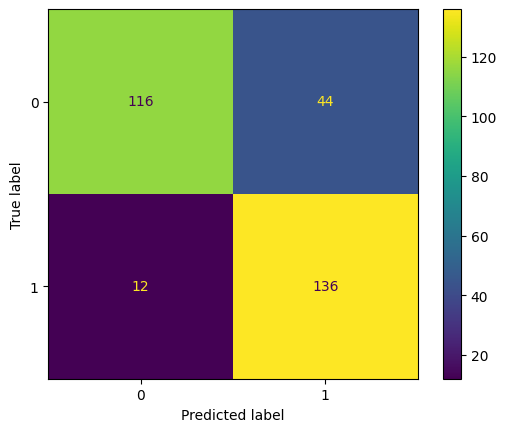

In [ ]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
accuracy = accuracy_score(y_test,y_predict)

In [ ]:
accuracy

0.8181818181818182

### När man ändrar över vilken % som ska bli klassad som potentiellt hjärtsjuk så ändras ju såklart värdet på vår accuracy, då det ändå handlar om sjukdom så vill man ju kanske ha den så låg som möjligt men ändå ge ett bra resultat, jag beslutar mig för att mellan 30-40% så sätter den mest rätta på dom som faktiskt är sjuka. Men den får ju då ganska mycket fel i dom som inte är det, det bästa resultatet som jag fann överlag på accuracy är vid 50-60% men då är det många sjuka som faller mellan raderna.